In [2]:
# dataset can be downloaded from: https://www.timeseriesclassification.com/description.php?Dataset=UrbanSound
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

In [39]:
filepath = 'UrbanSound/'
file_to_load = 'UrbanSound.arff'  # UrbanSound_TRAIN
sample_rate = 44100

In [6]:
data, meta = arff.loadarff(filepath + file_to_load)

In [7]:
meta

Dataset: UrbanSound
	att1's type is numeric
	att2's type is numeric
	att3's type is numeric
	att4's type is numeric
	att5's type is numeric
	att6's type is numeric
	att7's type is numeric
	att8's type is numeric
	att9's type is numeric
	att10's type is numeric
	att11's type is numeric
	att12's type is numeric
	att13's type is numeric
	att14's type is numeric
	att15's type is numeric
	att16's type is numeric
	att17's type is numeric
	att18's type is numeric
	att19's type is numeric
	att20's type is numeric
	att21's type is numeric
	att22's type is numeric
	att23's type is numeric
	att24's type is numeric
	att25's type is numeric
	att26's type is numeric
	att27's type is numeric
	att28's type is numeric
	att29's type is numeric
	att30's type is numeric
	att31's type is numeric
	att32's type is numeric
	att33's type is numeric
	att34's type is numeric
	att35's type is numeric
	att36's type is numeric
	att37's type is numeric
	att38's type is numeric
	att39's type is numeric
	att40's type 

In [30]:
sample_airconditioner_index = 0
sample_carhorn_index = 600
sample_childrenplaying_index = 907
sample_dogbark_index = 1506
sample_drilling_index = 2150
sample_engine_idling_index = 2706
sample_gunshot_index = 3330
sample_jackhammer_index = 3560
sample_siren_index = 4228
sample_street_music_index = 4900
print(data[sample_airconditioner_index][-1])
print(data[sample_carhorn_index][-1])
print(data[sample_childrenplaying_index][-1])
print(data[sample_dogbark_index][-1])
print(data[sample_drilling_index][-1])
print(data[sample_engine_idling_index][-1])
print(data[sample_gunshot_index][-1])
print(data[sample_jackhammer_index][-1])
print(data[sample_siren_index][-1])
print(data[sample_street_music_index][-1])

b'Air_conditioner'
b'Car_horn'
b'Children_playing'
b'Dog_bark'
b'Drilling'
b'Engine_idling'
b'Gun_shot'
b'Jackhammer'
b'Siren'
b'Street_music'


In [32]:
sample_audios = [
    {'title': 'Air_conditioner', 'index': 0, 'data': data[0].tolist()[:-1]},
    {'title': 'Car_horn', 'index': 600, 'data': data[600].tolist()[:-1]},
    {'title': 'Children_playing', 'index': 907, 'data': data[907].tolist()[:-1]},
    {'title': 'Dog_bark', 'index': 1506, 'data': data[1506].tolist()[:-1]},
    {'title': 'Drilling', 'index': 2150, 'data': data[2150].tolist()[:-1]},
    {'title': 'Engine_idling', 'index': 2706, 'data': data[2706].tolist()[:-1]},
    {'title': 'Gun_shot', 'index': 3330, 'data': data[3330].tolist()[:-1]},
    {'title': 'Jackhammer', 'index': 3560, 'data': data[3560].tolist()[:-1]},
    {'title': 'Siren', 'index': 4228, 'data': data[4228].tolist()[:-1]},
    {'title': 'Street_music', 'index': 4900, 'data': data[4900].tolist()[:-1]},
]

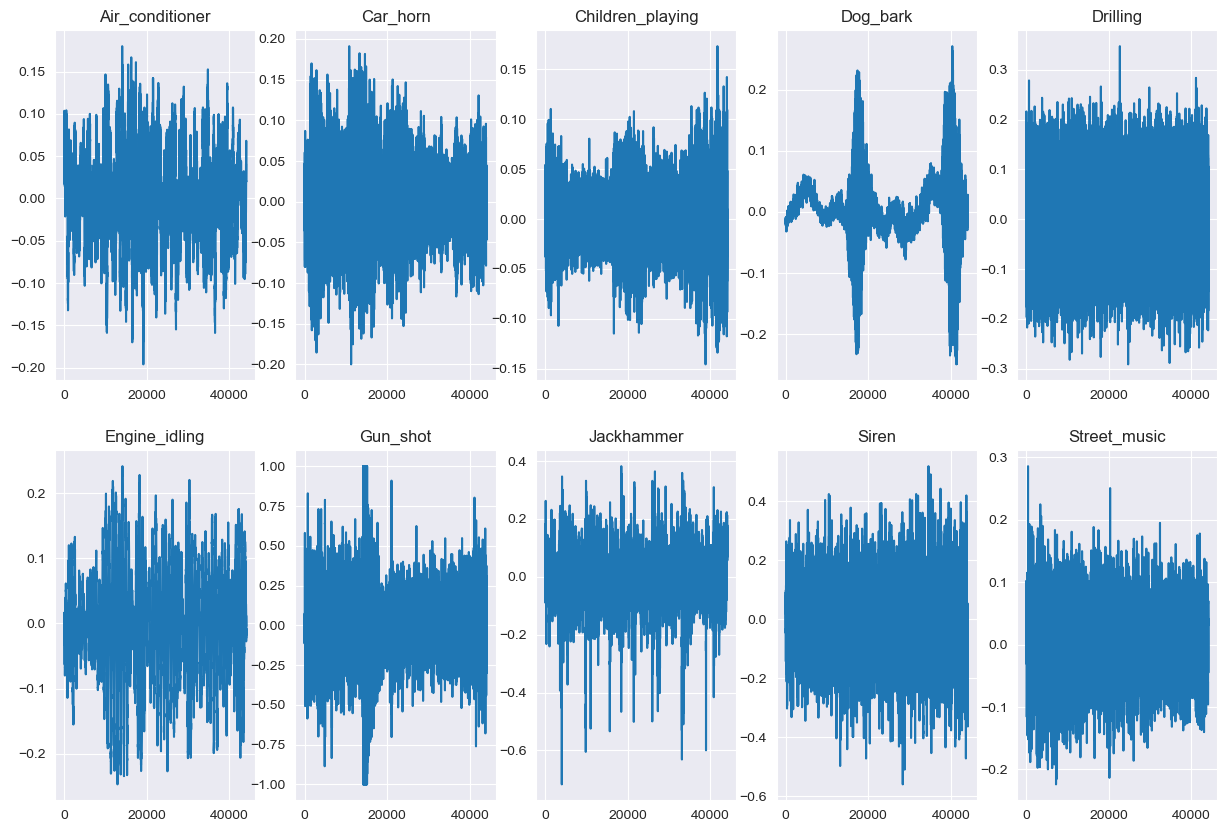

In [37]:
plt.figure(figsize=(15, 10))
for index, sample_audio in enumerate(sample_audios):
    plt.subplot(2, 5, index + 1)
    plt.title(sample_audio['title'])
    plt.plot(sample_audio['data'])

plt.show()

In [38]:
from IPython.display import Audio
Audio(data[600].tolist()[:-1], rate=sample_rate)

## Scalogram

In [40]:
from scipy import signal
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sample_audios[0]['data'], signal.ricker, widths)

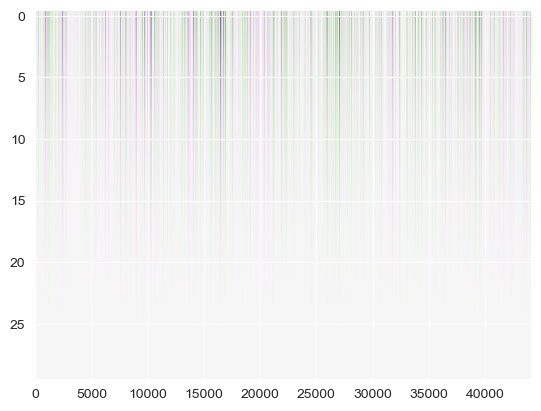

In [42]:
cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [45]:
# pywavelets
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
import pywt

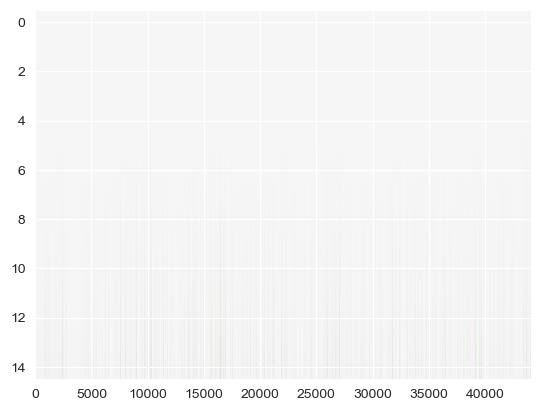

In [98]:
scales = np.arange(1, 16)  # TODO: what are usable scalevalues?
cwtmatr, freqs=pywt.cwt(sample_audios[0]['data'],scales,'mexh')
plt.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 

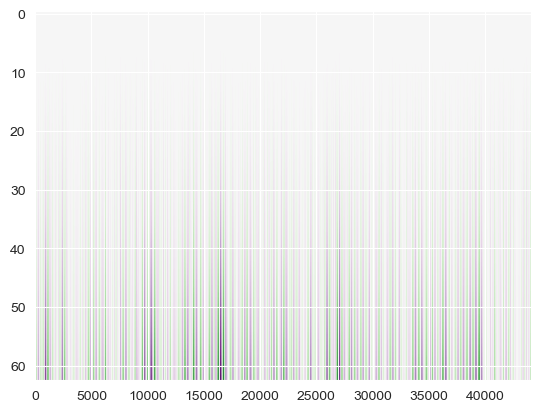

In [101]:
scales = np.arange(1, 64)  # TODO: what are usable scalevalues?
cwtmatr, freqs=pywt.cwt(sample_audios[0]['data'],scales,'mexh')
plt.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 

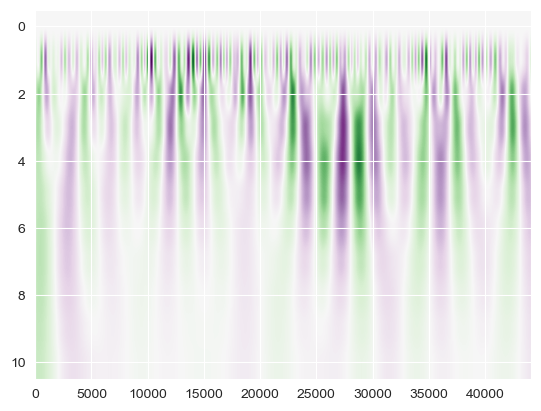

In [103]:
scales = np.arange(1, 2055, 200)  # TODO: what are usable scalevalues?
cwtmatr, freqs=pywt.cwt(sample_audios[0]['data'],scales,'mexh')
plt.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 

In [93]:
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
# https://github.com/OverLordGoldDragon/ssqueezepy

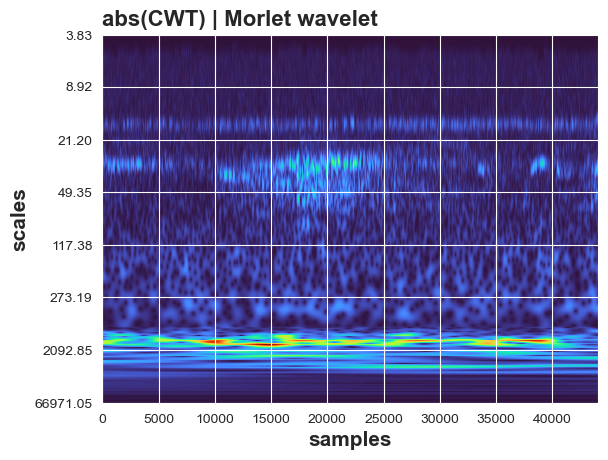

In [95]:
Wx, scales = cwt(np.array(sample_audios[0]['data'], dtype=np.float32), 'morlet')
imshow(Wx, yticks=scales, abs=1,
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")

## Scattering

In [72]:
from kymatio.torch import Scattering1D
# https://www.kymat.io/
# https://www.kymat.io/gallery_1d/plot_real_signal.html#sphx-glr-gallery-1d-plot-real-signal-py
from scipy import sparse
from kymatio.datasets import fetch_fsdd
import torch

In [86]:
test_data = np.array(sample_audios[0]['data'], dtype=np.float32)
test_data_norm = torch.from_numpy(test_data / np.max(np.abs(test_data)))

In [87]:
# prepare scattering
T = len(test_data_norm) # number of samples, T, is given by the size of our input x
J = 6  # averaging scale is specified as a power of two. set J = 6 to get an averaging, or maximum, scattering scale of 2**6 = 64 samples
Q = 16  # set the number of wavelets per octave. This lets us resolve frequencies at a resolution of 1/16 octaves.
scattering = Scattering1D(J, T, Q)

In [88]:
Sx = scattering(test_data_norm)

In [89]:
meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

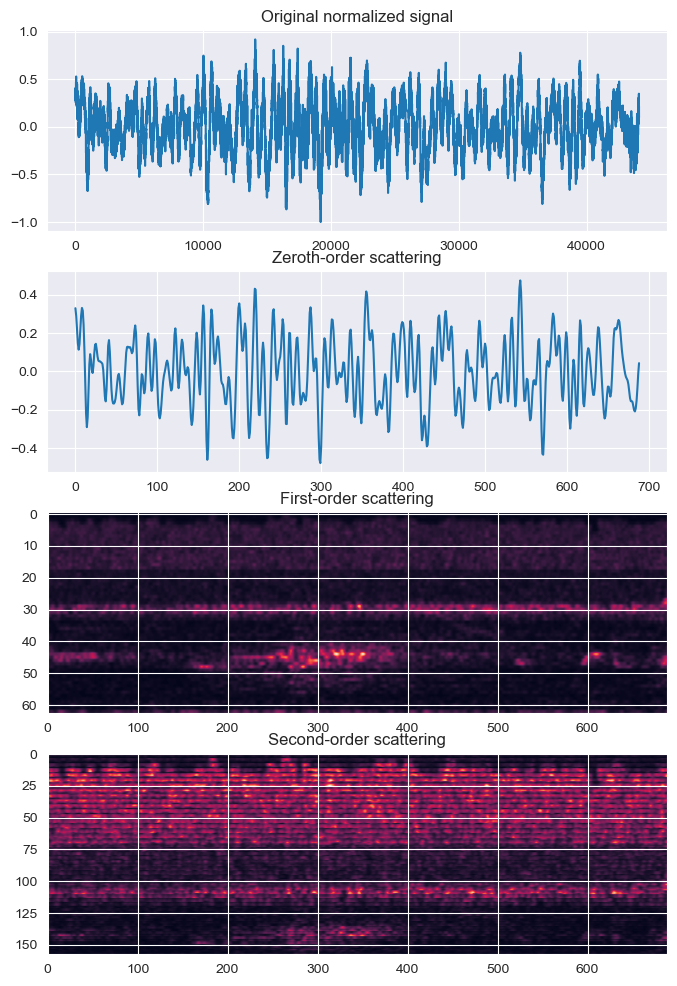

In [92]:
plt.figure(figsize=(8, 12))
plt.subplot(4, 1, 1)
plt.plot(test_data_norm)
plt.title('Original normalized signal')

plt.subplot(4, 1, 2)
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')  # simply an average of the original signal at the scale 2**J.

plt.subplot(4, 1, 3)
plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')

plt.subplot(4, 1, 4)
plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')

plt.show()